In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd # for data analytics
import numpy as np # for numerical computation
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score, confusion_matrix # for evaluation
import itertools


In [202]:
train = pd.read_csv("train.csv")

In [203]:
train.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,19491,0,0.798858,34y,0,0.478435,3500.0,5,0,1,0,0.0
1,149998,0,0.000000,30y,0,0.000000,5716.0,4,0,0,0,0.0
2,104899,1,0.906530,26y,0,426.000000,NaN,3,0,0,0,0.0
3,52731,0,0.026919,37y,0,1.017536,4333.0,15,0,2,0,0.0
4,73948,0,0.316901,54y,0,0.236717,21624.0,11,0,3,0,2.0


In [204]:
train['age'] = train['age'].str.replace("y","")


In [205]:
train['age'] = train['age'].astype('int32')

In [206]:
train['NumberOfDependents'].fillna('1', inplace=True)

In [207]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace=True)

In [208]:
train['NumberOfDependents'] = train['NumberOfDependents'].astype('int32')

In [209]:
train.drop(['Id'], inplace=True, axis=1)

In [210]:
train.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'30-59days', 
                'NumberOfTimes90DaysLate':'90days', 
                'NumberOfTime60-89DaysPastDueNotWorse':'60-89days',
                'NumberRealEstateLoansOrLines':'RealEstateLoans',
                'NumberOfDependents':'Dependents',
                'RevolvingUtilizationOfUnsecuredLines':'Revolving',
                'NumberOfOpenCreditLinesAndLoans':'OpenCreditLoans'}, inplace=True)

In [211]:
train.describe()

,SeriousDlqin2yrs,Revolving,age,30-59days,DebtRatio,MonthlyIncome,OpenCreditLoans,90days,RealEstateLoans,60-89days,Dependents
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,7.336300e+04,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000
mean,0.066082,5.733865,52.367665,0.411747,356.320191,6.452653e+03,8.442430,0.255865,1.017066,0.232065,0.762619
std,0.248428,226.828333,14.756965,4.089621,2164.354773,1.599220e+04,5.115313,4.064638,1.141430,4.051417,1.100080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029803,41.000000,0.000000,0.174562,3.895500e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155165,52.000000,0.000000,0.365460,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.565279,63.000000,0.000000,0.868657,7.374500e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


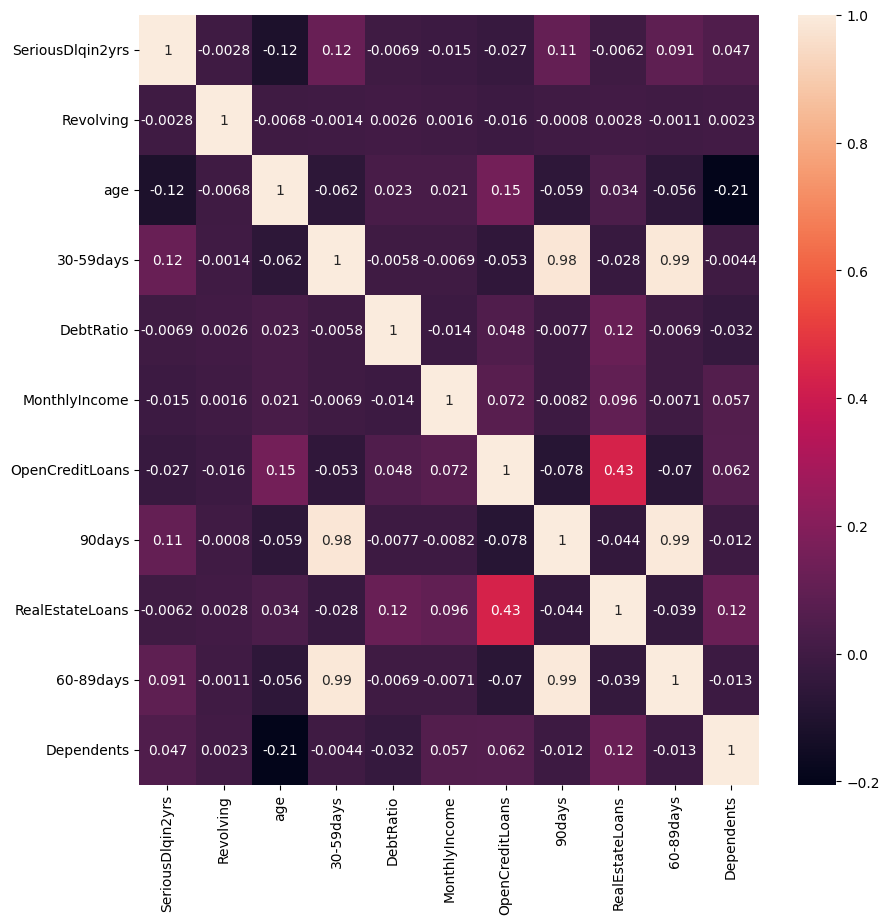

In [212]:
plt.style.use('default')
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True);

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeriousDlqin2yrs  73363 non-null  int64  
 1   Revolving         73363 non-null  float64
 2   age               73363 non-null  int32  
 3   30-59days         73363 non-null  int64  
 4   DebtRatio         73363 non-null  float64
 5   MonthlyIncome     73363 non-null  float64
 6   OpenCreditLoans   73363 non-null  int64  
 7   90days            73363 non-null  int64  
 8   RealEstateLoans   73363 non-null  int64  
 9   60-89days         73363 non-null  int64  
 10  Dependents        73363 non-null  int32  
dtypes: float64(3), int32(2), int64(6)
memory usage: 5.6 MB


## Logistic Regression and Decision Tree

In [214]:
train.columns

Index(['SeriousDlqin2yrs', 'Revolving', 'age', '30-59days', 'DebtRatio',
       'MonthlyIncome', 'OpenCreditLoans', '90days', 'RealEstateLoans',
       '60-89days', 'Dependents'],
      dtype='object')

In [244]:
from sklearn.model_selection import train_test_split

X = train[['age', '30-59days', 'DebtRatio','MonthlyIncome', '90days','60-89days','Dependents']]
#X = train[['30-59days', '90days','60-89days']]
y = train['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state=42)

In [245]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(58690, 7)
(14673, 7)
(58690,)
(14673,)


In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [247]:
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();
clf_ran = RandomForestClassifier();

clf_tree.fit(X_train, y_train); 
clf_reg.fit(X_train, y_train);
clf_ran.fit(X_train, y_train);


C:\Users\hugom\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [248]:
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]
y_score3 = clf_ran.predict_proba(X_test)[:,1]

In [249]:
from sklearn.metrics import roc_curve, roc_auc_score


In [250]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

In [251]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_score3))

roc_auc_score for DecisionTree:  0.5943359389651991
roc_auc_score for Logistic Regression:  0.695274791636972
roc_auc_score for RandomForest:  0.7765745568300313


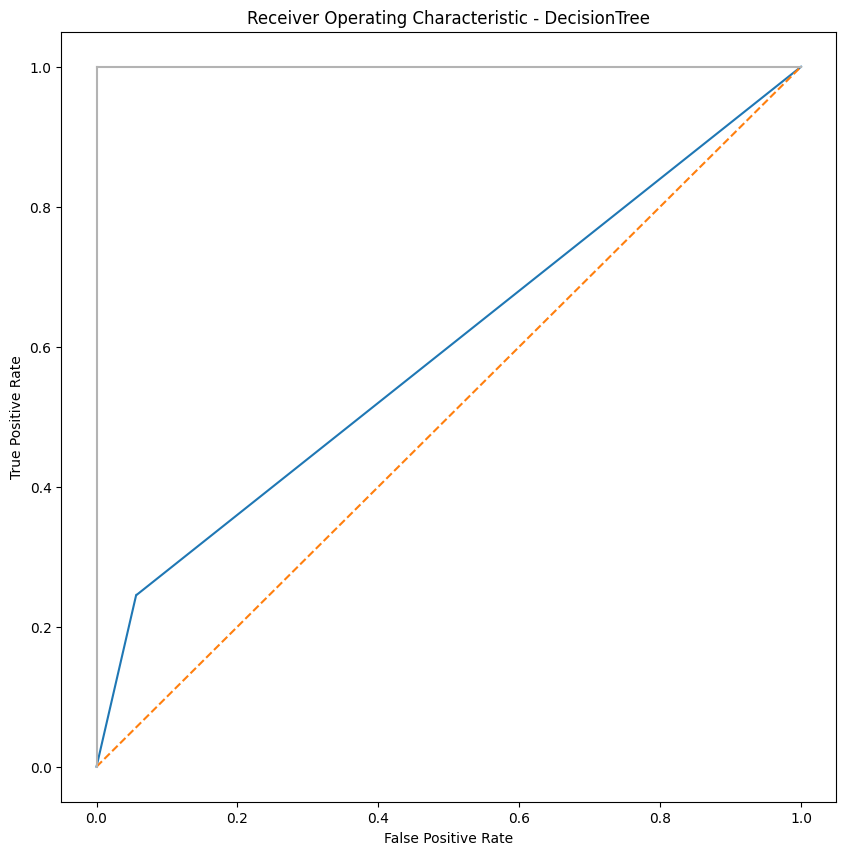

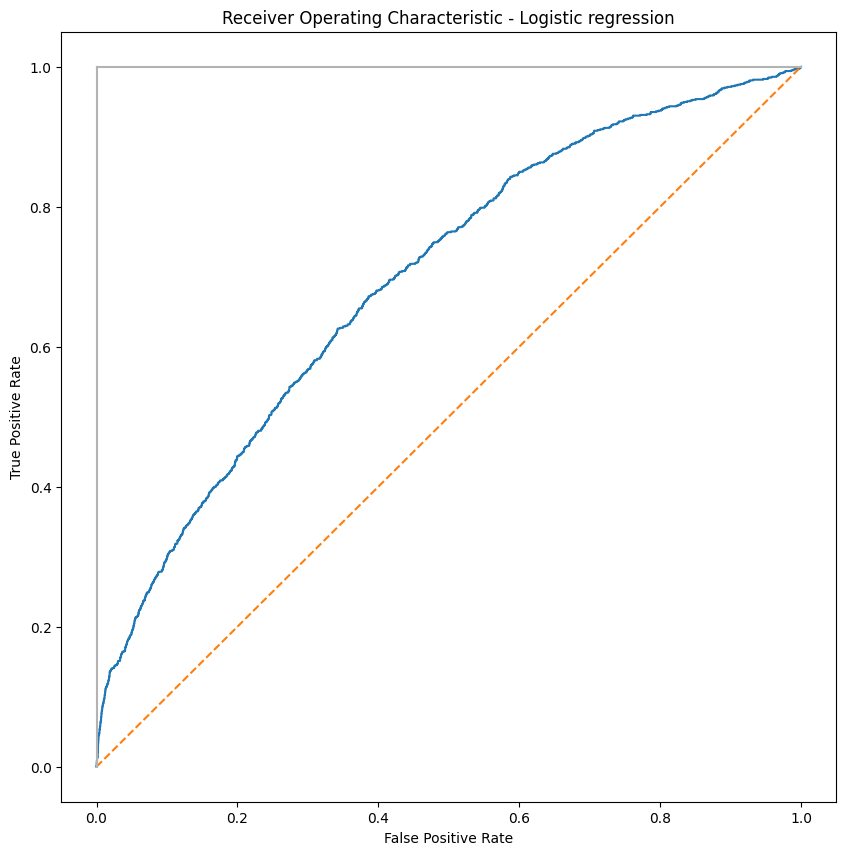

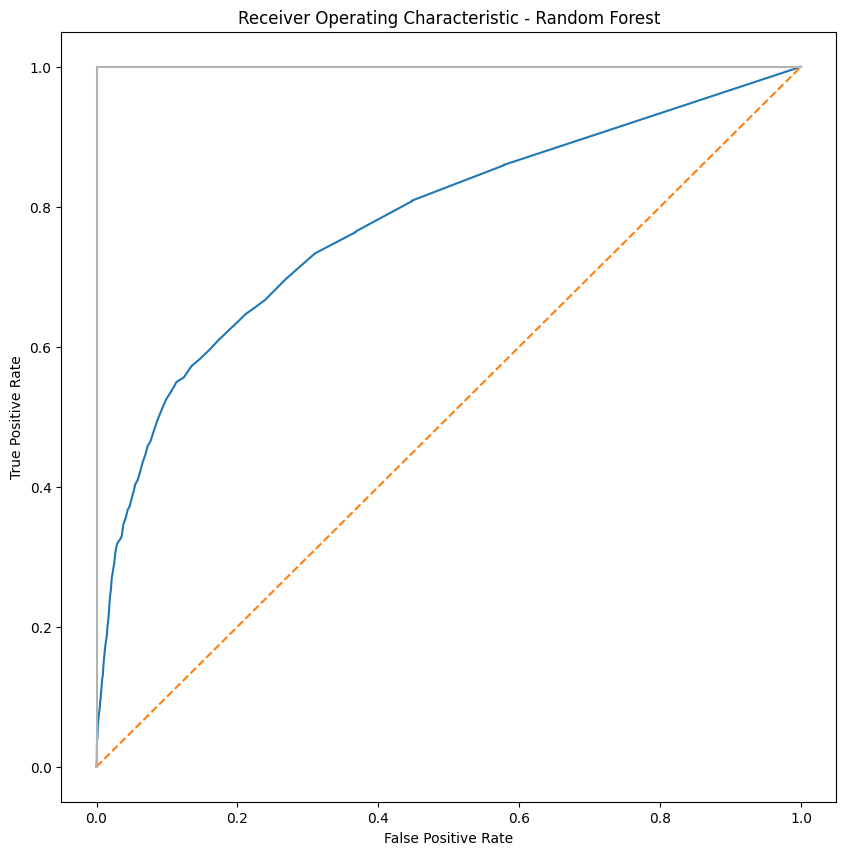

In [252]:
plt.style.use('default')
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Test

In [253]:
testpd = pd.read_csv("test.csv")
testpd.head()


,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,99280,0.712610,31y,0,3487.000000,NaN,6,0,1,0,0.0
1,38932,0.000000,56y,3,2956.000000,NaN,5,0,1,0,0.0
2,63810,0.146790,48y,0,0.006666,9750.0,5,0,0,0,1.0
3,54278,0.000000,61y,0,0.416458,3596.0,13,0,1,0,1.0
4,103450,0.049132,35y,1,20.000000,NaN,3,0,0,0,0.0


In [254]:
testpd['age'] = testpd['age'].str.replace("y","")


In [255]:
testpd['age'] = testpd['age'].astype('int32')


In [256]:
testpd['NumberOfDependents'].fillna('1', inplace=True)


In [257]:
testpd['MonthlyIncome'].fillna(testpd['MonthlyIncome'].median(), inplace=True)


In [258]:
testpd['NumberOfDependents'] = testpd['NumberOfDependents'].astype('int32')


In [259]:
testpd.drop(['Id'], inplace=True, axis=1)


In [260]:
testpd.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'30-59days', 
                'NumberOfTimes90DaysLate':'90days', 
                'NumberOfTime60-89DaysPastDueNotWorse':'60-89days',
                'NumberRealEstateLoansOrLines':'RealEstateLoans',
                'NumberOfDependents':'Dependents',
                'RevolvingUtilizationOfUnsecuredLines':'Revolving',
                'NumberOfOpenCreditLinesAndLoans':'OpenCreditLoans'}, inplace=True)

In [261]:
testpd.columns

Index(['Revolving', 'age', '30-59days', 'DebtRatio', 'MonthlyIncome',
       'OpenCreditLoans', '90days', 'RealEstateLoans', '60-89days',
       'Dependents'],
      dtype='object')

## Hacer la predicción

In [268]:
X = testpd[['age', '30-59days', 'DebtRatio','MonthlyIncome', '90days','60-89days','Dependents']]
#X = testpd[["30-59days", "90days", "60-89days"]]
X.shape

(31442, 7)

In [269]:
predictions_submit = clf_ran.predict(X)
predictions_submit

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Subir Kaggle

In [270]:
sample = pd.read_csv("sample_submission.csv")

In [271]:
sample.columns

Index(['Id', 'SeriousDlqin2yrs'], dtype='object')

In [272]:
submission = pd.DataFrame({"Id": sample['Id'],"SeriousDlqin2yrs": predictions_submit})
submission

,Id,SeriousDlqin2yrs
0,99280,0
1,38932,0
2,63810,0
3,54278,0
4,103450,0
...,...,...
31437,83439,0
31438,124027,0
31439,92374,0
31440,116097,0


In [273]:
sample.head()

,Id,SeriousDlqin2yrs
0,99280,1
1,38932,0
2,63810,0
3,54278,1
4,103450,0


In [274]:
sample.shape

(31442, 2)

In [275]:
sample.columns

Index(['Id', 'SeriousDlqin2yrs'], dtype='object')

## Chequeator

In [276]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [277]:
chequeator(submission)

You're ready to submit!


In [278]:
solution_hm3 = submission.to_csv('solution_hm3.csv', index=False)
